## AdaBoost

# what is adaboost?
AdaBoost stands for Adaptive Boosting. Its a type of ensemble learning technique that combine multiple weak learners to create a strong, more accurate model. 


AdaBoost Steps:
- Train a weak model
- Identify Errors
- Train next weak model
- Combine the model
  

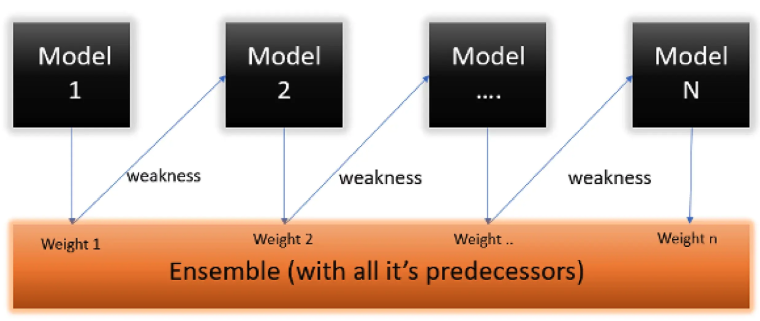

In [1]:
# Libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# load dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [4]:
# Create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Split data

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=42)

In [6]:
# Base learner 

base_model = DecisionTreeRegressor(max_depth=3)

# Adaboost
ada_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)

# fit model 
ada_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)

In [7]:
# Predict 
y_pred = ada_model.predict(X_test)

# Evaluate 

mse = mean_squared_error(y_test, y_pred)

In [8]:
mse

np.float64(0.7609211447145869)

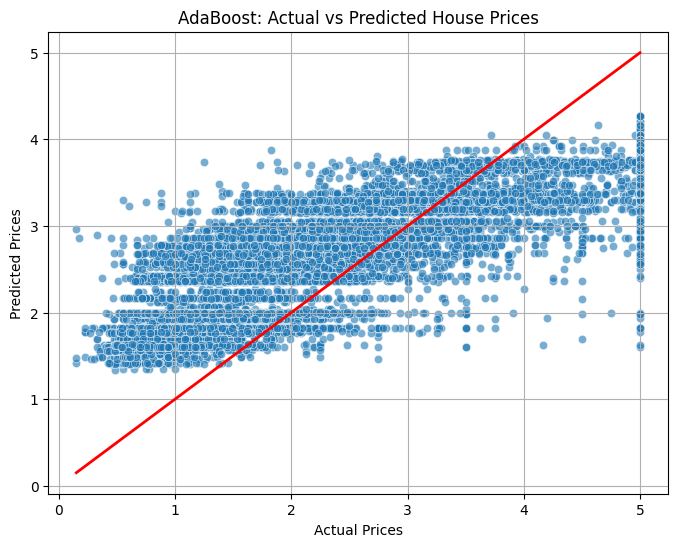

In [9]:
# Visualize 

# Predicted vs Actual Prices - Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('AdaBoost: Actual vs Predicted House Prices')
plt.grid(True)
plt.show()



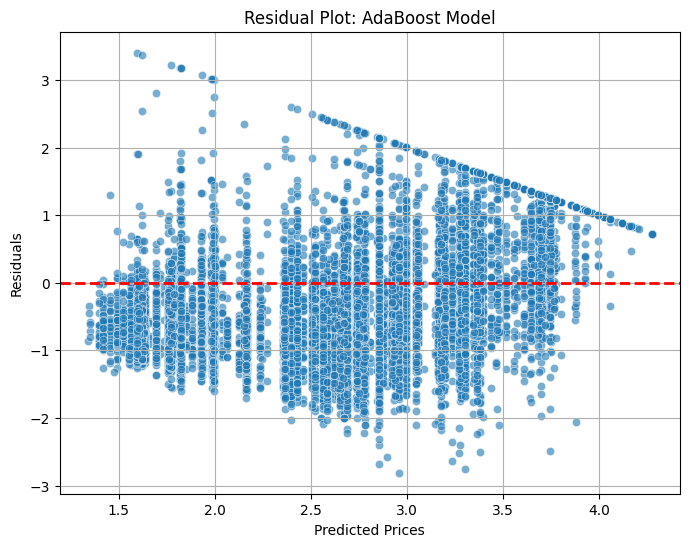

In [10]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot: AdaBoost Model')
plt.grid(True)
plt.show()


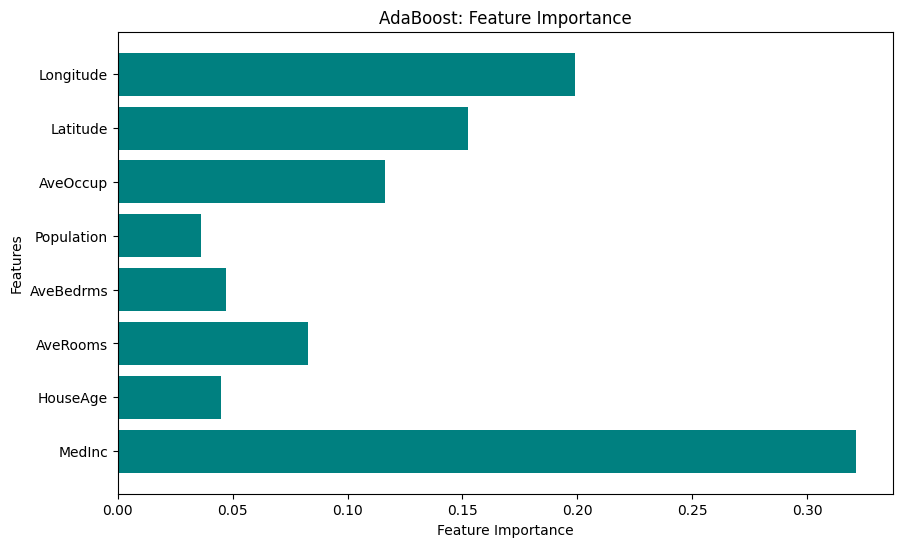

In [11]:
# Plot feature importances
importances = ada_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='teal')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('AdaBoost: Feature Importance')
plt.show()


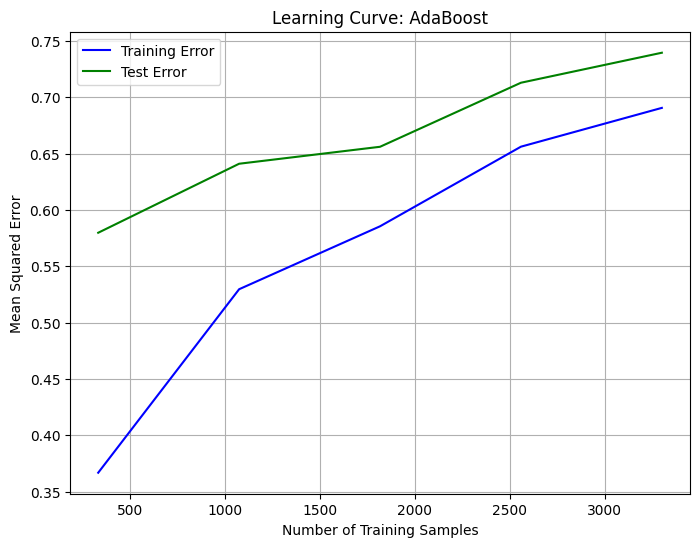

In [12]:
# Plot Learning Curve (Training vs Test Error)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(ada_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and test scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Error", color="blue")
plt.plot(train_sizes, test_mean, label="Test Error", color="green")
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve: AdaBoost')
plt.legend()
plt.grid(True)
plt.show()
